In [ ]:
#zadanie 1.1
import pandas as pd

data = {'Produkt': ['Laptop', 'Telefon', 'Tablet', 'Monitor'],
        'Cena': [3000, 1500, 2000, 800],
        'Ilość': [20, 50, 31, 300],
        'Koszt jednorazowy': [1000, 1000, 1200, 400]}

df = pd.DataFrame(data)
df

,Produkt,Cena,Ilość,Koszt jednorazowy
0,Laptop,3000,20,1000
1,Telefon,1500,50,1000
2,Tablet,2000,31,1200
3,Monitor,800,300,400


In [ ]:
#zadanie 1.2
import numpy as np

df['Przychód'] = df['Cena'] * df['Ilość']
df['Koszt całkowity'] = df['Koszt jednorazowy'] * df['Ilość']
df['Zysk'] = df['Przychód'] - df['Koszt całkowity']
df['Log(Cena)'] = np.log(df['Cena'])
df

,Produkt,Cena,Ilość,Koszt jednorazowy,Przychód,Koszt całkowity,Zysk,Log(Cena)
0,Laptop,3000,20,1000,60000,20000,40000,8.006368
1,Telefon,1500,50,1000,75000,50000,25000,7.313220
2,Tablet,2000,31,1200,62000,37200,24800,7.600902
3,Monitor,800,300,400,240000,120000,120000,6.684612


In [ ]:
#zadanie 1.3
print(df['Przychód'].sum(), df['Zysk'].sum(), df['Koszt całkowity'].sum())
print(df['Cena'].mean())
print(df['Produkt'][df['Zysk'].idxmax()])

437000 209800 227200
1825.0
Monitor


In [ ]:
#zadanie 1.4
prz_st = df['Przychód'].sum()
df['Cena'] = df['Cena'] * 1.1
df['Przychód'] = df['Cena'] * df['Ilość']
prz_n = df['Przychód'].sum()
prz_rozn = prz_n - prz_st
print(prz_rozn)

43700.00000000012


In [ ]:
#zadanie 1.5
i=0
print('Zysk większy niż 2500:')
while i < len(df['Zysk']):
    if df['Zysk'][i] >= 2500:
        print(df['Produkt'][i])
    i += 1
i=0
print('Ilość większa niż 30:')
while i < len(df['Ilość']):
    if df['Ilość'][i] > 30:
        print(df['Produkt'][i])
    i += 1
i=0
print('Cena większa niż 1000:')
while i < len(df['Cena']):
    if df['Cena'][i] > 1000:
        print(df['Produkt'][i])
    i += 1

Zysk większy niż 2500:
Laptop
Telefon
Tablet
Monitor
Ilość większa niż 30:
Telefon
Tablet
Monitor
Cena większa niż 1000:
Laptop
Telefon
Tablet


In [ ]:
#zadanie 1.6
df.sort_values(by='Zysk', ascending=False, inplace=True)
df

,Produkt,Cena,Ilość,Koszt jednorazowy,Przychód,Koszt całkowity,Zysk,Log(Cena)
3,Monitor,880.0,300,400,264000.0,120000,120000,6.684612
0,Laptop,3300.0,20,1000,66000.0,20000,40000,8.006368
1,Telefon,1650.0,50,1000,82500.0,50000,25000,7.313220
2,Tablet,2200.0,31,1200,68200.0,37200,24800,7.600902


In [ ]:
#zadanie 1.6 cd
df.sort_values(by='Cena', ascending=True, inplace=True)
df

,Produkt,Cena,Ilość,Koszt jednorazowy,Przychód,Koszt całkowity,Zysk,Log(Cena)
3,Monitor,880.0,300,400,264000.0,120000,120000,6.684612
1,Telefon,1650.0,50,1000,82500.0,50000,25000,7.313220
2,Tablet,2200.0,31,1200,68200.0,37200,24800,7.600902
0,Laptop,3300.0,20,1000,66000.0,20000,40000,8.006368


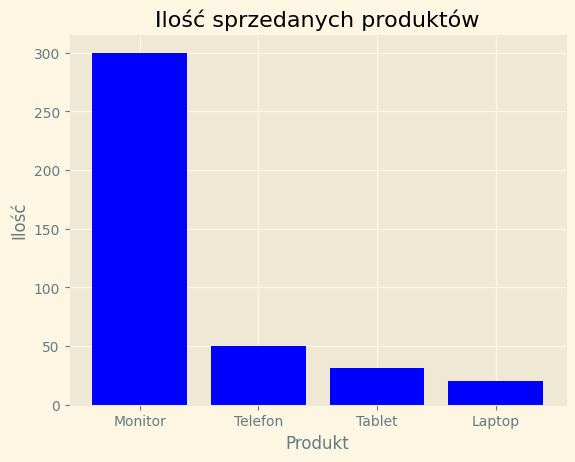

In [57]:
#zadanie 1.7
import matplotlib.pyplot as plt
plt.bar(df['Produkt'], df['Ilość'], color='blue')
plt.xlabel('Produkt')
plt.ylabel('Ilość')
plt.title('Ilość sprzedanych produktów')
plt.show()

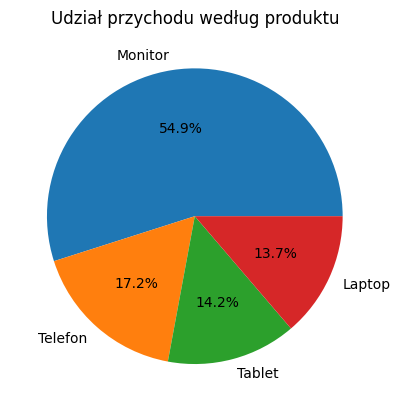

In [ ]:
#zadanie 1.8
plt.pie(df['Przychód'], labels=df['Produkt'], autopct='%1.1f%%')
plt.title('Udział przychodu według produktu')
plt.show()

In [ ]:
#zadanie 1.9
file_save = "sprzedaz.csv"
df.to_csv(file_save, index=False)

In [47]:
#zadanie 2.1
def f(x):
    return np.exp(-0.1*x)*np.sin(2*x)+0.5*np.cos(0.5*x)

In [48]:
#zadanie 2.2
x = np.arange(0, 20, 0.1)
y = f(x)
df2 = pd.DataFrame({'x': x, 'f(x)': y})
df2[:10]

,x,f(x)
0,0.0,0.500000
1,0.1,0.696068
2,0.2,0.879209
3,0.3,1.042340
4,0.4,1.179261
5,0.5,1.284888
6,0.6,1.355430
7,0.7,1.388514
8,0.8,1.383253
9,0.9,1.340253


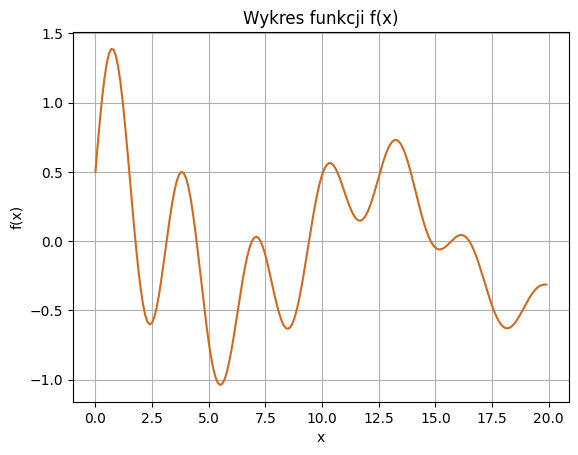

In [49]:
#zadanie 2.3
plt.plot(x, y, color='chocolate')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x)')
plt.grid(True)
plt.style.use('Solarize_Light2')
plt.show()


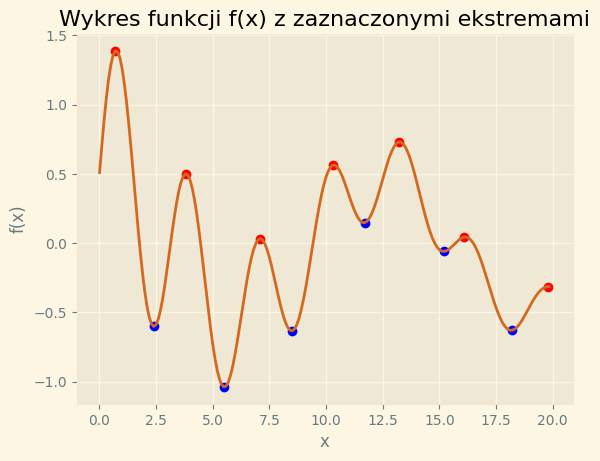

In [51]:
#zadanie 2.4
import scipy as sp 

maxy = sp.signal.argrelextrema(df2['f(x)'].values, np.greater)
miny = sp.signal.argrelextrema(df2['f(x)'].values, np.less)
plt.plot(x, y, color='chocolate')
plt.scatter(x[maxy], y[maxy], color='red', label='Maksima')
plt.scatter(x[miny], y[miny], color='blue', label='Minima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x) z zaznaczonymi ekstremami')
plt.grid(True)
plt.style.use('Solarize_Light2')
plt.show()


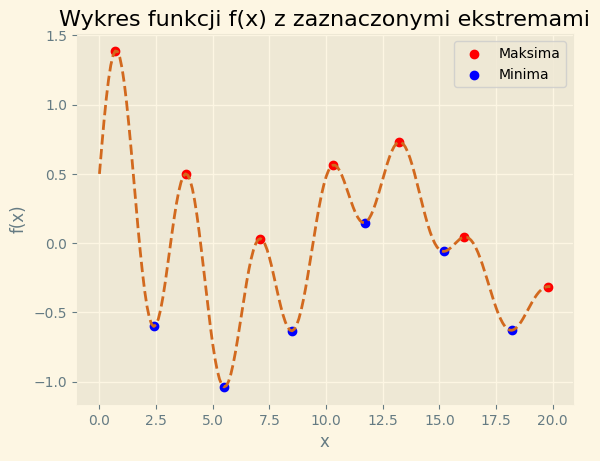

In [55]:
#zadanie 2.5
maxy = sp.signal.argrelextrema(df2['f(x)'].values, np.greater)
miny = sp.signal.argrelextrema(df2['f(x)'].values, np.less)
plt.plot(x, y, color='chocolate', linestyle='dashed')
plt.scatter(x[maxy], y[maxy], color='red', label='Maksima')
plt.scatter(x[miny], y[miny], color='blue', label='Minima')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x) z zaznaczonymi ekstremami')
plt.grid(True)
plt.style.use('Solarize_Light2')
#zadanie 2.6
plt.savefig('wykres_funkcji.png', dpi=300)
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_16844\3986127096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produkt', y='Ilość', data=df, palette='viridis')


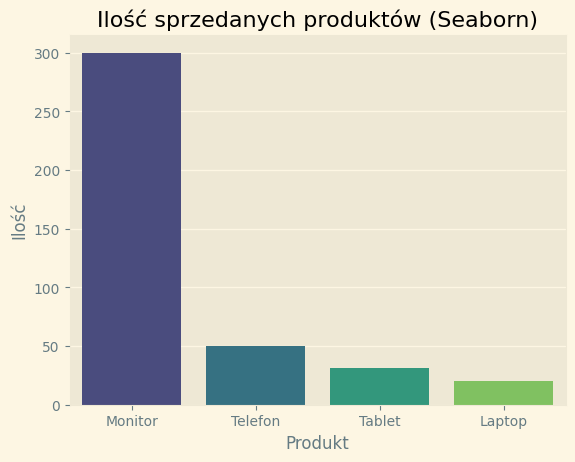

In [58]:
import seaborn as sns

# Wykres słupkowy ilości produktów
sns.barplot(x='Produkt', y='Ilość', data=df, palette='viridis')
plt.xlabel('Produkt')
plt.ylabel('Ilość')
plt.title('Ilość sprzedanych produktów (Seaborn)')
plt.show()